#### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set
 > On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load essential library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Explore the Data

In [4]:
data = pd.read_csv("datascience.csv")
data.sample(10) #shows us random 10 lines of the dataframe to get a general sense of the data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2833,2834,31,975,129,1,credit_card,2017-03-25 17:36:40
1241,1242,82,723,354,2,credit_card,2017-03-22 1:05:21
3010,3011,53,785,112,1,cash,2017-03-11 22:42:39
1512,1513,42,946,352,1,debit,2017-03-24 13:35:04
284,285,64,711,399,3,debit,2017-03-11 20:07:53
1179,1180,80,792,145,1,cash,2017-03-27 8:49:15
3611,3612,36,885,130,1,cash,2017-03-21 2:53:01
2054,2055,53,733,112,1,cash,2017-03-29 5:54:37
131,132,33,777,346,2,debit,2017-03-13 18:46:55
1001,1002,24,933,140,1,cash,2017-03-26 1:49:47


In [5]:
print(data.info()) #shows us the data type of the 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


In [6]:
data.describe() # shows us the statistical summary of the DataFrame

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
> From the statistical summary, the mean of the column 'order_amount' is equivalent to the AOV that we orignially calculated, in this case is $3145.123. 


> To get a better intution of what goes wrong with our caclulation, how we orignally got the wrong caclulation is listed as below:

In [7]:
wrong_aov = data['order_amount'].sum() / data['total_items'].count()
np.round(wrong_aov, decimals = 2)

3145.13

> Instead of using the built-in function count( ) to count the number of entries, we should use the built-in fuction sum( ) to caclulate the number of orders. 

In [8]:
aov = data['order_amount'].sum()/data['total_items'].sum()
np.round(aov, decimals = 2) #keep the decimal place to 2 to align with our intended calculation

357.92

> The average order value (AOV) calculated here is $357.92 after we use the sum( ) function. By going back to last row of the statistical summary, we can see there are outliers in the columns of 'order_amount' and 'total_items'. We can therefore see the calculation is still a bit off here since the sneakers should be affordable items due to the outliers of the 'order_amount' and 'total_items'. Due to the outliers, the average order value (AOV) is not representable for the true average order value.

>As such, I decide to take a step further to clean (if necessary) and visualize the data to get a better intution of the outliers.

#### Clean the Data

In [9]:
# check if there is any missing value within each column
pd.isnull(data).any() # the data is complete as there are no null values

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

#### Exploratory Data Analysis

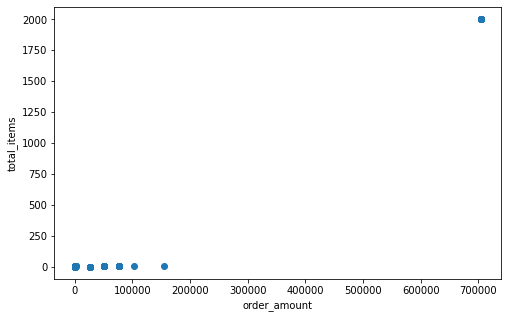

In [10]:
# visualize the 'order_amount' and 'total_items' to identify there are any outliers
figure, axis = plt.subplots(figsize=(8,5)) # use scatterplot to show the two variables in the data
axis.scatter(data['order_amount'], data['total_items'])
axis.set_xlabel('order_amount')
axis.set_ylabel('total_items')
plt.show()

#### b. What metric would you report for this dataset?
> Outliers affect the mean value of the data but have little effect on the median or mode of a given set of data. 

> As such, I choose to use median of the given set of data as metric to report for this dataset

In [11]:
correct_aov = data['order_amount'].median() / data['total_items'].median()
print(correct_aov)

142.0


#### c. What is its value?
> The average order value (AOV) should be $142.